# Comparison across mice strains
c57 vs SWISS w father (1-18) vs SWISS without father (19-35)

In [1]:
# !pip install odfpy
# !pip install seaborn
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
from yaml import Loader
import numpy as np
import analyze_cells_energy as ace
import utils
from scipy.stats import ttest_ind, mannwhitneyu

In [4]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
c57 = 'C57_MaleUrine_Exposure_cFos'
swiss = 'SWISS_MaleUrine_Exposure'
subjects = ace.list_subjects(root_directory)
data_directory_c57 = root_directory + experiment + '/' \
                + c57 + '/'
data_directory_swiss = root_directory + experiment + '/' \
                + swiss + '/'


In [24]:
subjects_c57 = [name for name in os.listdir(data_directory_c57) \
                if os.path.isdir(os.path.join(data_directory_c57, name))]

In [12]:
subjects_swiss = [name for name in os.listdir(data_directory_swiss) \
                if os.path.isdir(os.path.join(data_directory_swiss, name))]

In [23]:
subjects_swiss_with_father = [sub for sub in subjects_swiss if sub[0:2]=='SW' and int(sub[2:].split('_')[0]) in set(range(2,19))]


In [25]:
subjects_swiss_without_father = [sub for sub in subjects_swiss if sub[0:2]=='SW' and int(sub[2:].split('_')[0]) in set(range(19,36))]

## Load data

In [82]:
df = {'ncells', 'group'}
df = pd.DataFrame(columns=['ncells', 'group'])
df

,ncells,group


In [83]:
# load data
c57 = np.load('dict_results_across_mice_c57.npy', allow_pickle=True).item()
n_cells_c57 = [c57[mouse]['n_cells'].sum() for mouse in c57.keys()]
n_cells_c57

[51326,
 184635,
 7858,
 71038,
 54186,
 15954,
 30276,
 27165,
 31823,
 37389,
 28444,
 79600,
 44441,
 70573,
 43805,
 21746]

In [84]:
df_c57 = pd.DataFrame(columns=['ncells', 'group'])
df_c57['ncells'] = n_cells_c57
df_c57['group'] = 'c57 (300)'
df = df.append(df_c57)

In [85]:
# load data
c57_700 = np.load('dict_results_across_mice_c57_700.npy', allow_pickle=True).item()
n_cells_c57_700 = [c57_700[mouse]['n_cells'].sum() for mouse in c57_700.keys()]
n_cells_c57_700

[5931,
 32198,
 453,
 8934,
 6275,
 1369,
 3007,
 2469,
 2353,
 3968,
 1824,
 9017,
 5219,
 10418,
 4464,
 2025]

In [86]:
df_c57_700 = pd.DataFrame(columns=['ncells', 'group'])
df_c57_700['ncells'] = n_cells_c57_700
df_c57_700['group'] = 'c57 (700)'
df = df.append(df_c57_700)

In [87]:
# load data
swiss_without_father = np.load('dict_results_across_mice_SW1-18.npy', allow_pickle=True).item()
n_cells_without_father = [swiss_without_father[mouse]['n_cells'].sum() for mouse in swiss_without_father.keys()]
n_cells_without_father

[87874,
 178969,
 11131,
 79187,
 68964,
 78398,
 248151,
 83696,
 50147,
 197976,
 103336,
 71708]

In [88]:
df_swiss_without_father = pd.DataFrame(columns=['ncells', 'group'])
df_swiss_without_father['ncells'] = n_cells_without_father
df_swiss_without_father['group'] = 'swiss_1-18'
df = df.append(df_swiss_without_father)

In [89]:
# load data
swiss_with_father = np.load('dict_results_across_mice_SW19-35.npy', allow_pickle=True).item()
n_cells_with_father = [swiss_with_father[mouse]['n_cells'].sum() for mouse in swiss_with_father.keys()]
n_cells_with_father

[395226,
 270989,
 344693,
 271212,
 142272,
 365499,
 54791,
 164244,
 511510,
 199982,
 188869,
 260142,
 329460,
 300997,
 364006,
 277520,
 117589]

In [90]:
df_swiss_with_father = pd.DataFrame(columns=['ncells', 'group'])
df_swiss_with_father['ncells'] = n_cells_with_father
df_swiss_with_father['group'] = 'swiss_19-35'
df = df.append(df_swiss_with_father)

<AxesSubplot:xlabel='ncells', ylabel='group'>

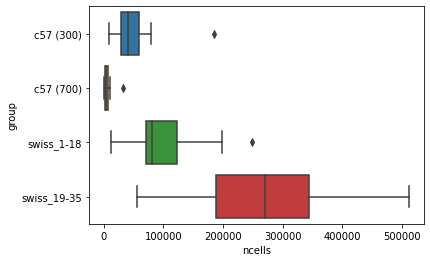

In [91]:
sns.boxplot(data=df, x="ncells", y="group")